<a target="_blank" href="https://colab.research.google.com/github/victorlymarev/pandas/blob/main/notebooks/13-statistics.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Агрегации 
#### [Ссылка на видео](https://youtu.be/AYeN8DhNNIM)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
path_empl = '../tables_/employees.parquet' if os.path.exists('../tables_/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl).query('report_dt >= "2022-10-31"')[
    ['report_dt', 'fio', 'sex', 'birth_date', 'mgmt_flag', 'employee_evaluation', 'salary']]
empl.head()

## Построение гистограмм

Как правило, у гистограммы по оси х расположен какой-то непрерывный показатель (например зарплаата или возраст), разделенный на интервалы. Высота стоблца означает, какое количесво наблюдений попало в каждый инервал.

In [ ]:
empl['salary'].hist()
# Можно еще написать
# plt.hist(empl['salary'])
# [ 20500.,  33920.,  47340.,  60760.,  74180.,  87600., 101020., 114440., 127860., 141280., 154700.]

In [ ]:
plt.figure(figsize=(9, 4)) # определяем размеры графика, первое значение - ширина, второе высота

plt.hist(empl['salary'], # данные
         range=(20000, 155000), # range - интервал, на котором строится гистограмма
         bins=27 # bins=количество столбцов, на которые делется интервал 
        )

plt.title('Гитрограмма зарплат') # добавляем название графика
plt.xlabel('Зарплата, руб') # добавляем название оси х
plt.ylabel('Количество наблюдений') # добавляем название оси у
plt.xticks([i for i in range(20000, 160001, 10000)], rotation=20)
plt.grid(alpha=0.1) # добавляем сетку, устанвливая уровень прозрачности
plt.show() # выводим график на экран

In [ ]:
plt.figure(figsize=(10, 5))

(sns.histplot(data=empl, # датафрейм откуда берутся данные
              x='salary', # название колонки по которой строится график
              binwidth=5000, # ширина стобца
              binrange=(20000, 155000), # интервал, на котором строится гистограмма
              stat='percent' # статистика, которая будет считаться по оси y
             )
    .set(title='Гитограмма зарплат', xlabel='Зарплата, руб', ylabel='%')
)
plt.show() # выводим график на экран

#### Ядерная оценка плотности

In [ ]:
plt.figure(figsize=(10, 5))
(sns.kdeplot(data=empl, # датафрейм
             x='salary', # колонка, по которой строится график
             common_norm=True, # площадь под графиком равна 1
             fill=True, # тень под графиком
             bw_method=0.01 # окно пропускания
            )
    .set(title='Ядерная оценка плотности', xlabel='Зарплата, руб', ylabel='Плотность')
)
plt.show()

## Статистики

Статистика - это функция от выборки (то есть от данных)

Это может быть среднее значение, сумма всех элементов элементов выборки, первое значение, число уникальных значений или просто сама выборка

### Сумма

In [ ]:
empl['salary'].sum()

### Произведение

In [ ]:
empl['salary'].head().prod()

### Количество заполненных строк

In [ ]:
empl['salary'].count()

## Характеристики среднего

### Среднее арифметическое

$$
Среднее\ арифметическое = {сумма \over количество\ непустых\ строк}
$$

In [ ]:
empl['salary'].mean()
# empl['salary'].sum() / empl['salary'].count()

Возвращаемое число не обычный float, а нампаевский

In [ ]:
type(empl['salary'].mean())

Поэтому с ним можно продолжать рабоать, например округлить

In [ ]:
empl['salary'].mean().round()

Центрирование данных (это вычитание из них среднего значения)

In [ ]:
empl['salary'] - empl['salary'].mean()

### Медиана

Медиана - это значение, которое находится посередине в отсортированном массиве

In [ ]:
# рисуем гистограмму
empl['salary'].hist(figsize=(10, 2), bins=27, range=(20000, 155000))
# рисуем вертикальную красную линию
plt.axline(xy1=(empl.query('report_dt == "2022-12-31"')['salary'].median(), 0),
           xy2=(empl.query('report_dt == "2022-12-31"')['salary'].median(), 100), color='r')
plt.show()

In [ ]:
empl['salary'].median()

### Мода

Мода - это самое частое значение

In [ ]:
empl['salary'].mode()

In [ ]:
empl.query('salary == salary.mode().item()')['salary'].count()

In [ ]:
empl['salary'].mode().item()
# empl['salary'].mode().iloc[0]

In [ ]:
pd.Series([1, 2, 3, 1, 3]).mode()

## Характеристики разброса

In [ ]:
plt.figure(figsize=(8, 5))
np.random.seed(10)
plt.subplot(2, 1, 1)
plt.hist(np.random.normal(0, 1, 10000), bins=50)
plt.xlim((-10, 10))
plt.subplot(2, 1, 2)
plt.hist(np.random.normal(0, 3, 10000), bins=50)
plt.xlim((-10, 10))
plt.show()

### Дисперсия

Дисперсия - это средний квадрат отклонения от среднего

In [ ]:
empl['salary'].var()

Попробуем посчитать ее руками

In [ ]:
((empl['salary'] - empl['salary'].mean()) ** 2).mean()

Как ее считает pandas

In [ ]:
# Усредняем полученные числа
((empl['salary'] - empl['salary'].mean()) ** 2).sum() / (empl['salary'].count() - 1)

In [ ]:
# Дисперсии равны
empl['salary'].var()

Можно не вычитать единицу из знаменателя, а просто усреднить

In [ ]:
((empl['salary'] - empl['salary'].mean()) ** 2).mean()

In [ ]:
empl['salary'].to_numpy().var()

In [ ]:
empl['salary'].var(ddof=0)

### Стандартное отклонение 

Стандартное отклонение (среднеквадратичное отклонение) - это квадратный корень из дисперсии

In [ ]:
empl['salary'].std()

In [ ]:
empl['salary'].var() ** 0.5

### Минимум максимум

In [ ]:
empl['salary'].min()

In [ ]:
empl['salary'].max()

### Квантили

In [ ]:
quantile = 0.75
salary = empl.query('report_dt == "2022-12-31"')['salary']

salary.hist(figsize=(10, 2), bins=27, range=(20000, 155000))

plt.axline(xy1=(salary.quantile(quantile), 0), xy2=(salary.quantile(quantile), 100), color='r')

plt.annotate(f'{int(quantile * 100)}% людей зарабатывают \n меньше или столько же',
            (salary.quantile(quantile), 20), xytext=(salary.quantile(quantile) + 5000, 100),
             arrowprops={'arrowstyle': '->'})

plt.title(f'{quantile} квантиль зарплат равен {salary.quantile(quantile)}')
plt.grid(False)
plt.xlabel('Зарплата')
plt.ylabel('Количество наблюдений')
plt.show()

In [ ]:
empl.query('report_dt == "2022-12-31"')['salary'].quantile(0.2)

Если квантиль в точности не определен, тогда он будет интерполирован

In [ ]:
# в массииве только целые числа, но метод вернул дробное число
empl['salary'].quantile(0.0001)

Это же касается и медианы

In [ ]:
pd.Series([1, 2, 3, 4]).median()

In [ ]:
pd.Series([1, 2, 3, 4]).quantile(0.5)

In [ ]:
pd.Series([1, 2, 3, 4]).quantile(0.5, interpolation='higher')

### При помощи метода rank можно получить квантиль каждого наблюдения

In [ ]:
empl['salary'].rank(pct=True).head()

#### В numpy функции и методы называются так же как и в пандасе кроме квантилей

In [ ]:
np.mean(np.arange(100))

In [ ]:
np.arange(100).mean()

Персентиль в сто раз больше квантиля

In [ ]:
np.percentile(np.arange(1001), 57)

In [ ]:
pd.Series(np.arange(1001)).quantile(0.57)

### Все эти методы есть и у датафреймов

In [ ]:
path_marks = '../tables/оценки.xlsx' if os.path.exists('../tables/оценки.xlsx') else 'https://drive.google.com/uc?id=17f4DXx53J0WooNkhO13xidseZJ-O2obs'

marks = pd.read_excel(path_marks)
marks.head()

In [ ]:
# Считаем среднее только по колонкам, в которых лежат числа
marks.mean(numeric_only=True)

In [ ]:
# Если все колонки уже численные, то параметр numeric_only можно не использовать
marks[['Математика', 'Литература']].mean()

### Можно указывать ось, по которой считать статистику

In [ ]:
(marks
    .set_index(['ФИО', 'Пол']) # убираем нечисленные колонки
    .mean(axis=1)
    .to_frame()
)

### Расчет статистики по всему датафрейму целиком

In [ ]:
# Работает с версии 2.0.0. и выше
(marks
    .set_index(['ФИО', 'Пол']) # убираем нечисленные колонки
    .mean(axis=None)
)

In [ ]:
(marks
    .set_index(['ФИО', 'Пол'])
    .to_numpy()
    .mean()
)

### Еще визуализация распределений

In [ ]:
sns.boxplot(data=empl, y='salary').set(title='Ящик с усами', ylabel='Зарплата')
plt.show()

In [ ]:
# Добавляем деление по оси х
plt.figure(figsize=(10, 5))
sns.boxplot(data=empl, y='salary', x='report_dt').set(title='Ящик с усами', ylabel='Зарплата')
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
(sns.boxplot(data=empl, y='salary', x='report_dt')
    .set(title='Ящик с усами', ylabel='Зарплата')
)
# обрезаем выбросы
plt.ylim((19000, 60000))
plt.show()

In [ ]:
# Добавляем hue
plt.figure(figsize=(10, 5))
(sns.boxplot(data=empl
                 .replace({'mgmt_flag': {0: 'Младший персонал', 1: 'Старший персонал'}}),
             y='salary', x='report_dt', hue='mgmt_flag')
 
    .set(title='Ящик с усами', ylabel='Зарплата')
)
plt.legend(loc='upper right')
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
(sns.violinplot(data=empl
                 .replace({'mgmt_flag': {0: 'Младший персонал', 1: 'Старший персонал'}}),
             y='salary', x='report_dt', hue='mgmt_flag')
 
    .set(title='Скрипичная диаграмма', ylabel='Зарплата')
)
plt.legend(loc='upper right')
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
(sns.stripplot(data=empl
                 .replace({'mgmt_flag': {0: 'Младший персонал', 1: 'Старший персонал'}}),
             y='salary', x='report_dt', hue='mgmt_flag')
 
    .set(title='Точечная диаграмма', ylabel='Зарплата')
)
plt.legend(loc='upper right')
plt.show()

### Корреляция

In [ ]:
plt.figure(figsize=(15, 10))
for i, cor in enumerate([0.1, 0.4, 0.7, 0.95, -0.1, -0.4, -0.7, -0.95]):
    # Генерируем данные
    np.random.seed(i + 1)
    x, y = np.random.multivariate_normal([0, 0], [[1, cor], [cor, 1]], 150).T
    y = y * np.random.randint(1, 5)
    # Говорим на какое место поставить график (2 стобца, 4 колонки, номер позиции)
    plt.subplot(2, 4, i + 1)
    # рисуем грайик
    sns.regplot(x=x, y=y)
    # подписываем график
    plt.title(f'Коэффициент корреляции: {np.round(np.corrcoef(x, y)[0][1], 2)}')
plt.show()

In [ ]:
np.random.seed(500)
t = np.random.rand(50) * 10
cos = np.cos(t) + np.random.normal(0, 0.05, 50)
sin = np.sin(t) + np.random.normal(0, 0.05, 50)
# рисуем график
plt.scatter(cos, sin)
# подписываем 
plt.text(y=0, x=0, s=f'corr = {np.corrcoef(cos, sin)[0, 1]:0.3f}', fontsize=16, ha='center', va='center')
plt.show()

#### Расчет коэффицииента корреляции

In [ ]:
marks['Математика'].corr(marks['Литература'])

То же самое можно сделать руками

In [ ]:
math_mean = marks['Математика'].mean()
math_std = marks['Математика'].std(ddof=0)

lit_mean = marks['Литература'].mean()
lit_std = marks['Литература'].std(ddof=0)

math_normilized = (marks['Математика'] - math_mean) / math_std
lit_normilized = (marks['Литература'] - lit_mean) / lit_std


(math_normilized * lit_normilized).mean()

###  Корреляционная матрица

In [ ]:
marks.corr(numeric_only=True)

In [ ]:
sns.heatmap(marks.corr(numeric_only=True))

In [ ]:
sns.heatmap(marks.corr(numeric_only=True),
            annot=True, # Добавляем численные значения в клетки
            # цветовая схема, разделенная на 8 цветов
            cmap=sns.color_palette("coolwarm", n_colors=8),
            vmin=-1, # минимальное значение в легенде
            vmax=1) # максимальное значение в легенде

Можно разукрасить сам датафрейм

In [ ]:
(marks
    .corr(numeric_only=True)
    .style
    .background_gradient(cmap=sns.color_palette("coolwarm", as_cmap=True),
                         axis=None,
                         vmin=-1,
                         vmax=1)
)

## Агрегация нескольких статистик вместе

### describe

In [ ]:
empl['salary'].describe()

In [ ]:
empl.describe()

Можно добавить дополнительные квантили

In [ ]:
empl.describe([0.1, 0.25, 0.75, 0.9])

### agg

Позволяет собирать несколько статистик вместе

In [ ]:
# список из названий методов
empl['salary'].agg(['mean', 'max', 'std'])

In [ ]:
# их можно комбинировать с функциями из numpy
empl['salary'].agg([np.mean, np.max, 'std'])

In [ ]:
# Можно использовать свои функции
(empl['salary']
    .agg(
        ['mean',
         lambda s: (s ** (1 / s.count())).prod(),
         lambda s: 1 / ((1 / s).mean())
        ])
    .set_axis(['Среднее арифметическое', 'Среднее геометрическое', 'Среднее гармоническое'])
)

#### Можно передать словарь. Сначала как метод будет называться, а затем функция

In [ ]:
(empl['salary']
    .agg({'Среднее арифметическое': 'mean',
          'Среднее геометрическое': lambda s: (s ** (1 / s.count())).prod(),
          'Среднее гармоническое': lambda s: 1 / ((1 / s).mean())
         })
)

### То же самое можно делать с датафреймами

In [ ]:
marks.head()

In [ ]:
# передаем список из функци
(marks
    .drop(['ФИО', 'Пол'], axis=1)
    .agg(['mean', 'max', 'min'])
)

In [ ]:
# можно передать словарь со списком функций агрегации
(marks
    .drop(['ФИО', 'Пол'], axis=1)
    .agg({'Математика': ['mean', 'max'],
         'Русский язык': 'std',
         'Литература': ['mean', 'median']})
)

In [ ]:
(marks
    .drop(['ФИО', 'Пол'], axis=1)
    .agg(avarage = ('Математика', 'mean'),
         summa = ('Математика', 'sum'),
         sqrt_err = ('История', 'std')
#          summa = ('История', 'sum'), # это работать не будет 
        )
)

## На вход функии в метод agg приходит объект Series

In [ ]:
(marks
    .drop(['ФИО', 'Пол'], axis=1)
    .agg(
        ['mean',
         lambda s: s[s >= 4].mean() # фильтровать значения получится только внутри колонки и только по ней самой
        ])
    .set_axis(['Среднее', 'Среднее среди тех, у кого 4 или 5'])
)

#### В метод agg нельзя передавать квантили

In [ ]:
empl['salary'].agg([np.mean, np.max, 'std', lambda x: x.quantile(0.8)])

In [ ]:
class Quantile:
    def __init__(self, q: float):
        self.q = q
        self.__name__ = f'{q} квантиль'
    
    def __call__(self, series: pd.Series):
        return series.quantile(self.q)

In [ ]:
empl['salary'].agg([np.mean, np.max, 'std', Quantile(0.8)])

#### Иногда после агрегации необходимо выполнять дополнительные действия

In [ ]:
path_sales_2022 = '../tables/sales_2022.parquet' if os.path.exists('../tables/sales_2022.parquet') else 'https://drive.google.com/uc?id=17e7FwXVdsWc2aziK9s5KidIvPcfKt9F5'
sales = pd.read_parquet(path_sales_2022).iloc[:, -2:]
sales.head()

Найдем среднюю строимость проданных товаров

In [ ]:
(sales
    .assign(price_mul_number = lambda x: x['price'] * x['goods_number'])
    [['goods_number', 'price_mul_number']]
    .sum()
    .to_frame()
    .T
    .assign(mean_goods_price_sold=lambda x: x['price_mul_number'] / x['goods_number'])
    .drop(['goods_number', 'price_mul_number'], axis=1)
     .iloc[0, 0]
)

### Статистические функции в сочетании с другими методами

#### Проверяем процент заполенных значений

In [ ]:
(empl
    .notnull()
    .mean()
)

#### Или наоборот считаем количество пропущенных значений

In [ ]:
empl['employee_evaluation'].isna().sum()

#### Доля людей, зарабатывающих больше 50 000

In [ ]:
empl['salary'].ge(50000).mean()
# То же самое, что и
# (empl['salary'] >= 50000).mean()

#### Число записей по зарплате, втречающихся только 1 раз

In [ ]:
(~empl['salary'].duplicated(keep=False)).sum()

#### Доля женщин в магазине

In [ ]:
empl['sex'].eq('женский').mean()
# Это то же самое, что и
# (empl['sex'] == 'женский').mean()

# Задания

#### Описание таблиц лежит [здесь](https://github.com/victorlymarev/pandas/tree/main/tables#%D0%BE%D0%BF%D0%B8%D1%81%D0%B0%D0%BD%D0%B8%D0%B5-%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86)

Некоторые таблицы занимают много памяти, поэтому каждые 5-10 заданий лучше перезапускайте ноутбук.

В формулировке некоторых заданий может содержаться вариативность. Если у вас есть сомнения, что требуется в задании, попробуйте решить несколько вариантов. Если вы не понимаете задание, можете написать об этом в комментариях под видео.

В большинстве случаев внешний вид итоговой таблицы не определен. Выведите на экран наиболее адекватный вариант. То есть таблицу, из которой можно будет сделать выводы.

Курс пока находится в разработке. Вы можете помочь другим людям добавив свое решение [сюда](https://docs.google.com/forms/d/1HYTBz_KfssY3Jps2dC3n0YnEqa6WBb5OIhLo1d32Xzw/edit).

Посмотреть решения других людей можно [здесь](https://docs.google.com/spreadsheets/d/1pMDYO-9UneLbPPnEuQ2shig0TOJdQTU-zipifyAnZMk/edit?resourcekey#gid=1998648012)

### Задание 1
Для таблицы stocks воспользуйтесь методом describe

In [ ]:
import os
import pandas as pd

path_stocks = '../tables/stocks.parquet' if os.path.exists('../tables/stocks.parquet') else 'https://drive.google.com/uc?id=1weGquTtmR92mKYAeZhZCFHJjndyoSXZt'

stocks = pd.read_parquet(path_stocks)
stocks.head()

In [ ]:
# Напишите свой код здесь

### Задание 2

Посчитайте долю выходных дней в 2020 году

In [ ]:
import os
import pandas as pd

path_w_ends = '../tables/выходные.csv' if os.path.exists('../tables/выходные.csv') else 'https://drive.google.com/uc?id=1hAsoXSPTFihFmBuF-E0uSj9pX4gpojwC'

w_ends = pd.read_csv(path_w_ends)
w_ends.head()

In [ ]:
# Напишите свой код здесь

### Задание 3

Для колонки зарплата посчитайте среднее значение, медиану, 0.25 квантиль, 0.9 квантиль, станадартное отклонение за 2022 год

In [ ]:
import os
import pandas as pd

path_empl = '../tables/employees.parquet' if os.path.exists('../tables/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl)
empl.head()

In [ ]:
# Напишите свой код здесь

### Задание 4

Посчитать какой процент женщин в руководстве (поле mgmt)

In [ ]:
import os
import pandas as pd

path_empl = '../tables/employees.parquet' if os.path.exists('../tables/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl)
empl.head()

In [ ]:
# Напишите свой код здесь

### Задание 5

Посчитать какой процент сотрудников - мужчины

In [ ]:
import os
import pandas as pd

path_empl = '../tables/employees.parquet' if os.path.exists('../tables/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl)
empl.head()

In [ ]:
# Напишите свой код здесь

### Задание 6

Посчитайте среднюю оценку по математике среди мальчиков

In [ ]:
import os
import pandas as pd

path_marks = '../tables/школьные оценки.xlsx' if os.path.exists('../tables/школьные оценки.xlsx') else 'https://drive.google.com/uc?id=1v9kRv1I03CXtQ6vFE4mE3hFAty436qAo'

marks = pd.read_excel(path_marks)
marks.head()

In [ ]:
# Напишите свой код здесь

### Задание 7

Посчитайте коэффициент корреляции между ценой товара и ценой товара по скидке

In [ ]:
import os
import pandas as pd

path_prices = '../tables/prices.parquet' if os.path.exists('../tables/prices.parquet') else 'https://drive.google.com/uc?id=1_KfYyYCsib8woanbP3VouLUpYp103dV5'

prices = pd.read_parquet(path_prices)
prices.head()

In [ ]:
# Напишите свой код здесь

### Задание 8

Найдите детей, у которых либо все тройки, либо все четверки, либо все пятерки

In [ ]:
import os
import pandas as pd

path_marks = '../tables/школьные оценки.xlsx' if os.path.exists('../tables/школьные оценки.xlsx') else 'https://drive.google.com/uc?id=1v9kRv1I03CXtQ6vFE4mE3hFAty436qAo'

marks = pd.read_excel(path_marks)
marks.head()

In [ ]:
# Напишите свой код здесь

### Задание 9

Посчитайте сумарную выручку и среднюю стоимость проданного товара в магазине 5

In [ ]:
# таблица sales - большая, и в некоторых случаях ваш компьютер может не справиться с ее обработкой
# поэтому лучше работайте с частью этой таблицы
# но если вы хотите попробовать поработать с полной версией таблицы,
# можете заменить переменную path_sales_2022 на path_sales внутри функции read_parquet

import os
import pandas as pd

path_sales_2022 = '../tables/sales_2022.parquet' if os.path.exists('../tables/sales_2022.parquet') else 'https://drive.google.com/uc?id=17e7FwXVdsWc2aziK9s5KidIvPcfKt9F5'
# path_sales = '../tables/sales.parquet' if os.path.exists('../tables/sales.parquet') else "https://drive.usercontent.google.com/download?id=15KwSxyM6hpNABGe6_vsrFZvD09VfHFyK&export=download&authuser=1&confirm=t&uuid=115bd48c-cc2c-4f2a-8b42-be5ca6ef6db8&at=APZUnTUVb8nfNANw5wr9Cad7PJ3U:1693327774694"

sales = pd.read_parquet(path_sales_2022)
sales.head()

In [ ]:
# Напишите свой код здесь

### Задание 10

Отберите детей, у которых была всего одна тройка

In [ ]:
import os
import pandas as pd

path_marks = '../tables/школьные оценки.xlsx' if os.path.exists('../tables/школьные оценки.xlsx') else 'https://drive.google.com/uc?id=1v9kRv1I03CXtQ6vFE4mE3hFAty436qAo'

marks = pd.read_excel(path_marks)
marks.head()

In [ ]:
# Напишите свой код здесь

### Задание 11

Согласно неравенству Маркова, для неотрицательного показателя доля наблюдейний, превышающих некоторое число а меньше или равна среднему значению этого показателя, деленному на это число а.

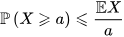

P - доля наблюдений, для которых выполняется условие, записанное в скобках

E X - среднее значение показателя X


Проверьте неравенство на данных по зарплате сотрудников по состоянию на 31 декабря 2022 года. Посчитайте долю сотрудников, зарабатывающих больше 90 000 и сравните это значение со средней зарплатой деленной на 90 000. Выполняется ли оно?

In [ ]:
import os
import pandas as pd

path_empl = '../tables/employees.parquet' if os.path.exists('../tables/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl)
empl.head()

In [ ]:
# Напишите свой код здесь

### Задание 12

Посчитайте среднюю оценку по математике среди мальчиков

Сделайте 100 выборок с возвращением в которых посчитайте 80 квантиль в зарплате мужчин за 31 декабря 2022 года. Усредните полученные значения

Затем сделайте то же самое, только для женщин. Сравните результаты

In [ ]:
import os
import pandas as pd

path_marks = '../tables/школьные оценки.xlsx' if os.path.exists('../tables/школьные оценки.xlsx') else 'https://drive.google.com/uc?id=1v9kRv1I03CXtQ6vFE4mE3hFAty436qAo'

marks = pd.read_excel(path_marks)
marks.head()

In [ ]:
# Напишите свой код здесь

### Задание 13

Перемножьте колонки price и goods_number и добавьте получившееся значение как отдельрную колнку. После этого для нее и для колонки price посчитайте 2 показателя: среднюю абсолютную ошибку относительно среднего и среднюю абсолютную ошибку относительно медианы. 

Для этого из каждого значения в колонке вычтите среднее (медиану) по колонке. Затем возьмите модуль от получившейся колонки. Затем усредните ее.

In [ ]:
# таблица sales - большая, и в некоторых случаях ваш компьютер может не справиться с ее обработкой
# поэтому лучше работайте с частью этой таблицы
# но если вы хотите попробовать поработать с полной версией таблицы,
# можете заменить переменную path_sales_2022 на path_sales внутри функции read_parquet

import os
import pandas as pd

path_sales_2022 = '../tables/sales_2022.parquet' if os.path.exists('../tables/sales_2022.parquet') else 'https://drive.google.com/uc?id=17e7FwXVdsWc2aziK9s5KidIvPcfKt9F5'
# path_sales = '../tables/sales.parquet' if os.path.exists('../tables/sales.parquet') else "https://drive.usercontent.google.com/download?id=15KwSxyM6hpNABGe6_vsrFZvD09VfHFyK&export=download&authuser=1&confirm=t&uuid=115bd48c-cc2c-4f2a-8b42-be5ca6ef6db8&at=APZUnTUVb8nfNANw5wr9Cad7PJ3U:1693327774694"

sales = pd.read_parquet(path_sales_2022)
sales.head()

In [ ]:
# Напишите свой код здесь

## Задания на нампай

### Задание 14

В нампае в большинстве случаев названия стат функций называются точно так же как и в пандасе.

Посчитайте среднее, и стандартное отклонение по всей матрице и по отдельной строке (в отдельных ячейках)

In [ ]:
import numpy as np
np.random.seed(21)
m = np.random.rand(56).reshape(-1, 4)
m

In [ ]:
# Напишите свой код здесь

### Задание 15

В этом задании давайте посмотрим на то, что если две нормальные случайные величины некоррелированы, то они необязательно независимы.

Просимулируем 2 нормальные случайные величины, создав 100000 реализаций каждой.

In [ ]:
from scipy.stats import shapiro
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(35)
x = np.random.normal(0, 1, size=100000)
y = x * np.random.choice([-1, 1], size=100000)

Проверим, что распрдееления действительно являются нормальными. Будем считать, что если pvalue больше 0.05, то распределение нормальное

In [ ]:
shapiro(x)

In [ ]:
shapiro(y)

Посчитайте коэффициент корреляции между x и y. Это можно сделать при помощи np.corrcoef. В эту функцию через запятую предайте x и y

In [ ]:
# Напишите свой код здесь

Как видите коэффициент корреляции очень близок к нулю (если считать теоретически, то он будет в точности равен нулю).

Теперь постройте scatter для переменных x и y при помощи функции plt.scatter(x, y). 
Можно ли сказать, что переменные независимы?

In [ ]:
# Напишите свой код здесь

При помощи теста Шапиро проверьте является ли нормальной случайной величина x + 2 * y.

Это кстати говорит о том, что сумма двух нормальных случайных величин необязательно распределена нормально. 

(Впрочем на самом деле это крайний случай)

In [ ]:
# Напишите свой код здесь

### Задание 16

Не используя функцию corr посчитайте коэффициент коррляции между оценками (задание для тех, кто знает как перемножать матрицы)

In [ ]:
import os
import pandas as pd

path_marks = '../tables/школьные оценки.xlsx' if os.path.exists('../tables/школьные оценки.xlsx') else 'https://drive.google.com/uc?id=1v9kRv1I03CXtQ6vFE4mE3hFAty436qAo'

marks = pd.read_excel(path_marks)
marks.head()

In [ ]:
# Напишите свой код здесь